# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
weather_api_key

'9c3bdbfd7df617cafb624791a835037e'

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}{city}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = time.ctime(city_weather['dt'])

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | kirchberg in tirol
Processing Record 5 of Set 1 | geraldton
Processing Record 6 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 7 of Set 1 | palmas
Processing Record 8 of Set 1 | kovdor
Processing Record 9 of Set 1 | naze
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | quiberon
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | paracuru
Processing Record 15 of Set 1 | ust-nera
Processing Record 16 of Set 1 | pandan
Processing Record 17 of Set 1 | puerto baquerizo moreno
Processing Record 18 of Set 1 | keflavik
Processing Record 19 of Set 1 | lobujya
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | misratah
Processing Rec

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [16]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,56.52,77,65,30.15,SH,Sun Aug 4 21:30:48 2024
1,adamstown,-25.0660,-130.1015,69.40,81,100,16.91,PN,Sun Aug 4 21:30:50 2024
2,albany,42.6001,-73.9662,75.67,74,0,1.99,US,Sun Aug 4 21:26:17 2024
3,kirchberg in tirol,47.3907,12.3072,60.69,97,97,1.99,AT,Sun Aug 4 21:30:53 2024
4,geraldton,-28.7667,114.6000,52.21,87,0,9.22,AU,Sun Aug 4 21:17:18 2024


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,56.52,77,65,30.15,SH,Sun Aug 4 21:30:48 2024
1,adamstown,-25.0660,-130.1015,69.40,81,100,16.91,PN,Sun Aug 4 21:30:50 2024
2,albany,42.6001,-73.9662,75.67,74,0,1.99,US,Sun Aug 4 21:26:17 2024
3,kirchberg in tirol,47.3907,12.3072,60.69,97,97,1.99,AT,Sun Aug 4 21:30:53 2024
4,geraldton,-28.7667,114.6000,52.21,87,0,9.22,AU,Sun Aug 4 21:17:18 2024


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

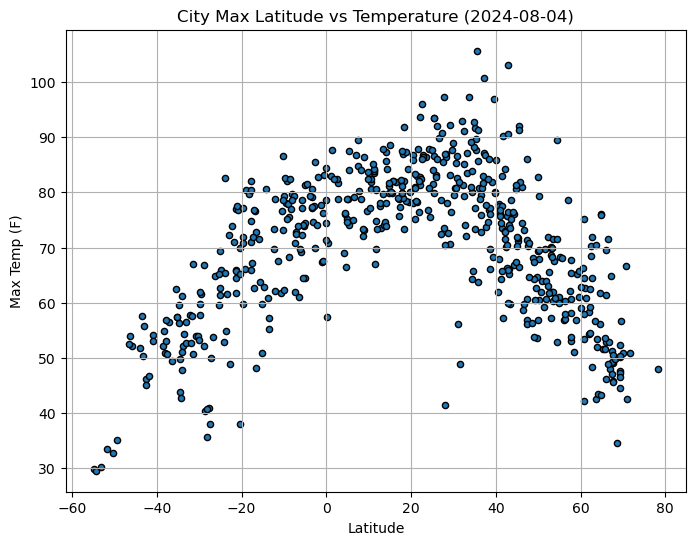

In [33]:
# Build scatter plot for latitude vs. temperature

# Incorporate the other graph properties
city_data_df.plot.scatter(
    'Lat', 'Max Temp', grid=True, edgecolor='black', xlabel = 'Latitude', ylabel = 'Max Temp (F)',
    figsize = [8,6], title = f'City Max Latitude vs Temperature ({time.strftime("%Y-%m-%d")})')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

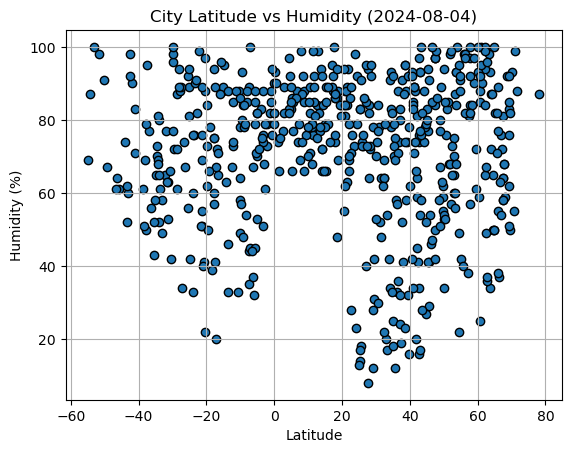

In [36]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df.Lat
y = city_data_df['Humidity']

plt.scatter(x, y, edgecolors='black')
# Incorporate the other graph properties
plt.grid()
plt.title(f'City Latitude vs Humidity ({time.strftime("%Y-%m-%d")})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

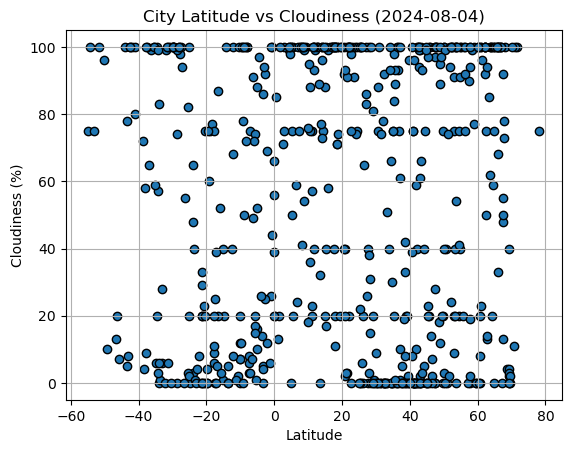

In [39]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df.Lat
y = city_data_df['Cloudiness']

plt.scatter(x, y, edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.title(f'City Latitude vs Cloudiness ({time.strftime("%Y-%m-%d")})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

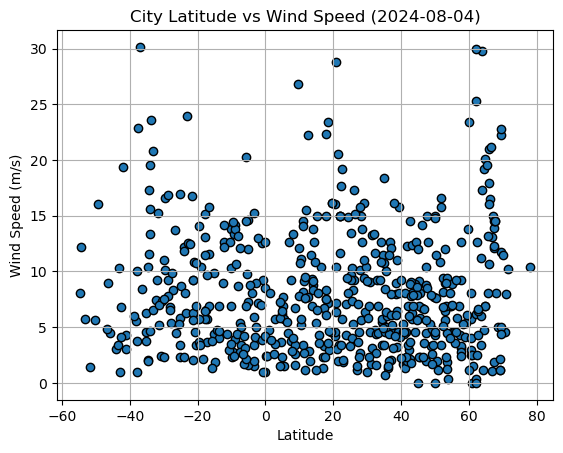

In [40]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df.Lat
y = city_data_df['Wind Speed']

plt.scatter(x, y, edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.title(f'City Latitude vs Wind Speed ({time.strftime("%Y-%m-%d")})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [50]:
# Define a function to create Linear Regression plots
def chart(x,y,title,coord):
    lr = linregress(x,y)
    dependent_var = x*lr.slope + lr.intercept

    print(f'The r^2-value is: {lr.rvalue}')

    plt.annotate(f'y = {lr.slope:.2f}x + {lr.intercept:.2f}', coord, c='r', fontsize=14)

    plt.plot(x,dependent_var, 'r', linewidth=4)
    plt.scatter(x,y, edgecolors='black')
    plt.title(f'Latitude vs {title} ({time.strftime("%Y-%m-%d")})')
    plt.ylabel(title)
    plt.xlabel('Latitude')
    plt.grid()

In [51]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df.Lat>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,albany,42.6001,-73.9662,75.67,74,0,1.99,US,Sun Aug 4 21:26:17 2024
3,kirchberg in tirol,47.3907,12.3072,60.69,97,97,1.99,AT,Sun Aug 4 21:30:53 2024
6,kovdor,67.5662,30.4758,49.05,81,13,1.88,RU,Sun Aug 4 21:30:58 2024
7,naze,28.3667,129.4833,86.92,72,15,15.01,JP,Sun Aug 4 21:17:28 2024
9,quiberon,47.4841,-3.1196,56.80,84,0,4.47,FR,Sun Aug 4 21:31:03 2024


In [52]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df.Lat<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,56.52,77,65,30.15,SH,Sun Aug 4 21:30:48 2024
1,adamstown,-25.0660,-130.1015,69.40,81,100,16.91,PN,Sun Aug 4 21:30:50 2024
4,geraldton,-28.7667,114.6000,52.21,87,0,9.22,AU,Sun Aug 4 21:17:18 2024
5,palmas,-10.2128,-48.3603,73.27,49,0,6.91,BR,Sun Aug 4 21:30:07 2024
8,avarua,-21.2078,-159.7750,77.05,69,20,9.22,CK,Sun Aug 4 21:31:01 2024


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: -0.6708867610697978


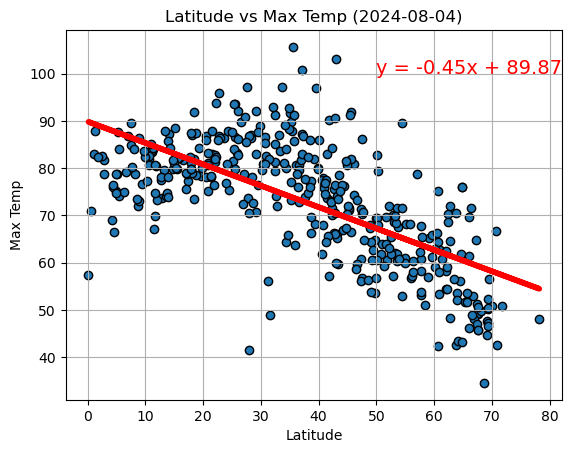

In [53]:
# Linear regression on Northern Hemisphere
x=northern_hemi_df.Lat
y=northern_hemi_df['Max Temp']
title = 'Max Temp'
coord = [50,100]

chart(x,y,title,coord)

The r^2-value is: 0.7860817453761803


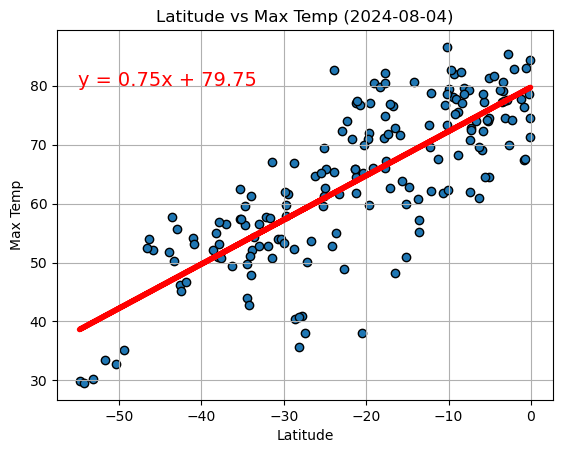

In [61]:
# Linear regression on Southern Hemisphere
x=southern_hemi_df.Lat
y=southern_hemi_df['Max Temp']
title = 'Max Temp'
coord = [-55,80]

chart(x,y,title,coord)

**Discussion about the linear relationship:** Based on both the Northern and Southern Hemisphere plots, there is a positive linear correlation between maximum temperature and proximity to the Equator, further evidenced by the -0.67 and 0.78 R2 values, respectively. In both hemispheres, temperatures decrease as distance from the Equator increases.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: -0.09623298006338603


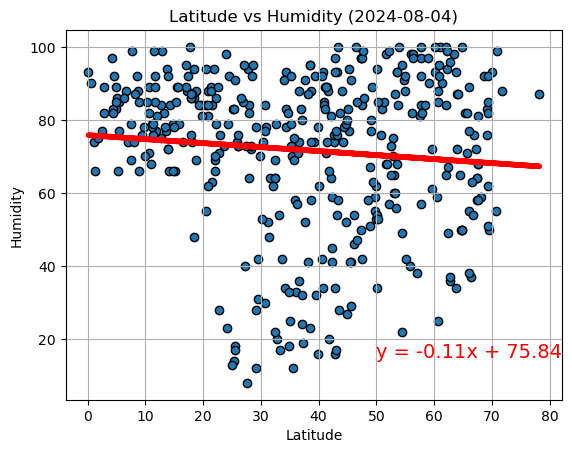

In [63]:
# Northern Hemisphere
x=northern_hemi_df.Lat
y=northern_hemi_df['Humidity']
title = 'Humidity'
coord = [50,15]

chart(x,y,title,coord)

The r^2-value is: 0.0005653698717818506


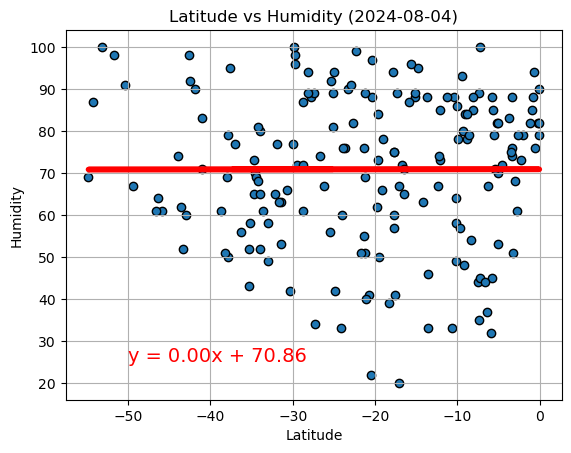

In [65]:
# Southern Hemisphere
x=southern_hemi_df.Lat
y=southern_hemi_df['Humidity']
title = 'Humidity'
coord = [-50,25]

chart(x,y,title,coord)

**Discussion about the linear relationship:** Based on the plots and the Northern and Southern Hemispheres' R2 values (-0.09 and 0.005), there does not appear to be any correlation between a city's latitude and its humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: -0.09805347847517654


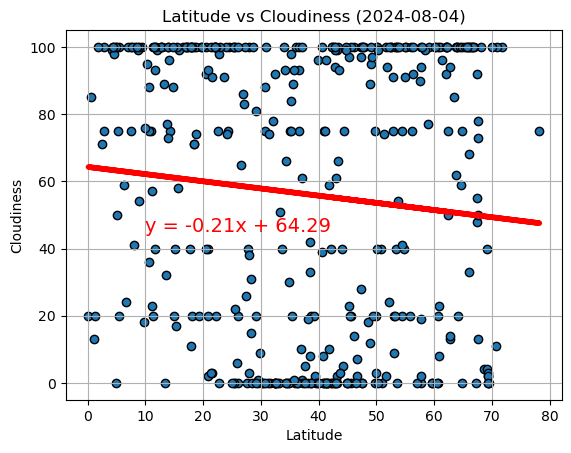

In [67]:
# Northern Hemisphere
x=northern_hemi_df.Lat
y=northern_hemi_df['Cloudiness']
title = 'Cloudiness'
coord = [10,45]

chart(x,y,title,coord)

The r^2-value is: -0.18866237720967075


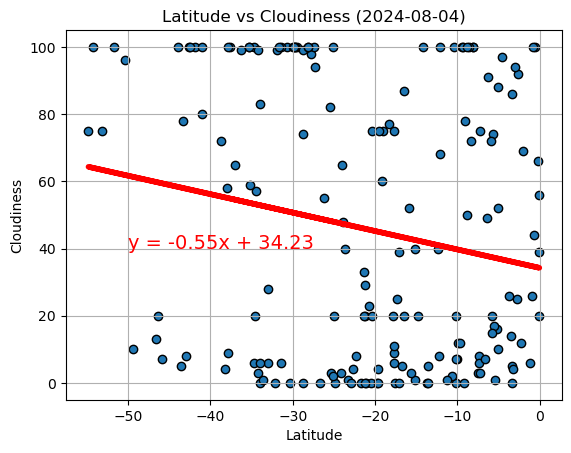

In [70]:
# Southern Hemisphere
x=southern_hemi_df.Lat
y=southern_hemi_df['Cloudiness']
title = 'Cloudiness'
coord = [-50,40]

chart(x,y,title,coord)

**Discussion about the linear relationship:** Similar to the Latitude vs Humidity plots above, there is no clear correlation between latitude and a city's cloudiness.  

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.06746948377078427


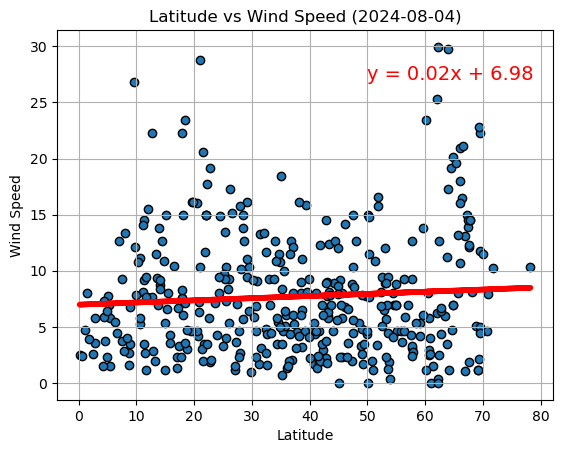

In [72]:
# Northern Hemisphere
x=northern_hemi_df.Lat
y=northern_hemi_df['Wind Speed']
title = 'Wind Speed'
coord = [50,27]

chart(x,y,title,coord)

The r^2-value is: -0.0870492705662615


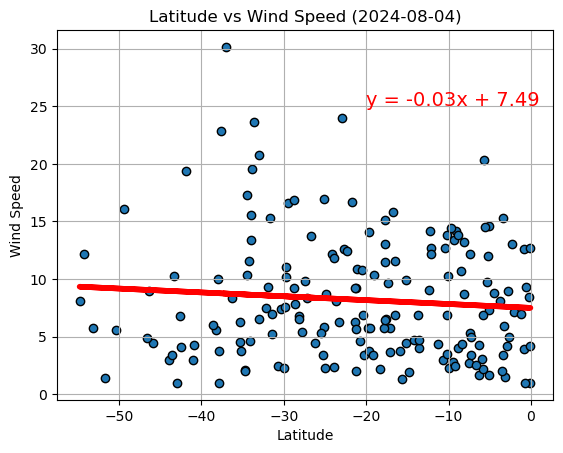

In [74]:
# Southern Hemisphere
x=southern_hemi_df.Lat
y=southern_hemi_df['Wind Speed']
title = 'Wind Speed'
coord = [-20,25]

chart(x,y,title,coord)

**Discussion about the linear relationship:** There is no linear relationship between latitude and wind speed. Both R2 values demonstrate an insignificant correlation.